In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def fix_color(img):
    top = img[0]
    bottom = img[-1]
    left = img[:,0]
    right = img[:,-1]
    avg=np.mean([np.mean(top),np.mean(bottom),np.mean(left),np.mean(right)])
    if avg>128:
        return 255-img
    return img
def process_img(img):
    img=cv2.medianBlur(img,3)
    img=cv2.medianBlur(img,3)
    ret2,thresholded = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    return fix_color(thresholded)
def get_min_rectangle(img):
    contours, hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    min_rects = []
    for contour in contours:
        min_rects.append(cv2.minAreaRect(contour))
    return min_rects
def plot_min_rects(img, min_rects):
    for rect in min_rects:
        box = cv2.boxPoints(rect)
        box = np.int64(box)
        cv2.drawContours(img, [box], 0, (0, 0, 255), 2)
    plt.imshow(img)
def calculate_avg_rectangle_angle(rect):
    angles = []
    for r in rect:
        #detect which orientation the rectangle is in and adjust the angle accordingly fix meee TODO
        # if r[1][0] > r[1][1]:
        #     if r[2] < -45:
        #         r = (r[0], (r[1][1], r[1][0]), r[2] + 90)
        #     elif r[2] > 45:
        #         r = (r[0], (r[1][1], r[1][0]), r[2] - 90)
        # else:
        #     if r[2] < -45:
        #         r = (r[0], (r[1][1], r[1][0]), r[2] + 90)
        #     elif r[2] > 45:
        #         r = (r[0], (r[1][1], r[1][0]), r[2] - 90)
        angles.append(r[2])
    angles = np.array(angles)
    angle = np.mean(angles)
    std=np.std(angles)
    #gets the angles that are within 1 standard deviation of the mean
    angles = angles[(angles > angle - std) & (angles < angle + std)]
    angle = np.mean(angles)
    return angle
def rotate_image(img, angle):
    print(angle)
    (h, w) = img.shape[:2]
    center = (w / 2, h / 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_img = cv2.warpAffine(img, M, (w, h))
    return rotated_img
def rotate_processed_image(img):
    rects=get_min_rectangle(cv2.dilate(img, np.ones((3,3), np.uint8), iterations=7))
    angle=calculate_avg_rectangle_angle(rects)
    rotated_img=rotate_image(img,angle)
    return rotated_img

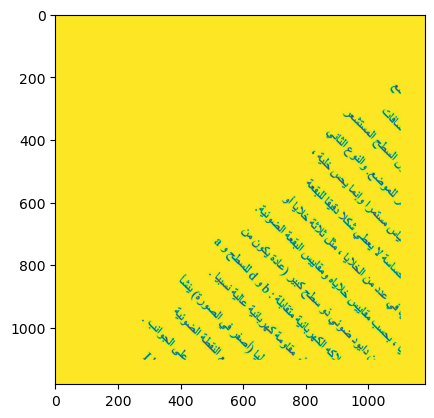

In [3]:
img=cv2.imread('../Dataset/Marhey/990.jpeg',cv2.IMREAD_GRAYSCALE)
plt.imshow(img)

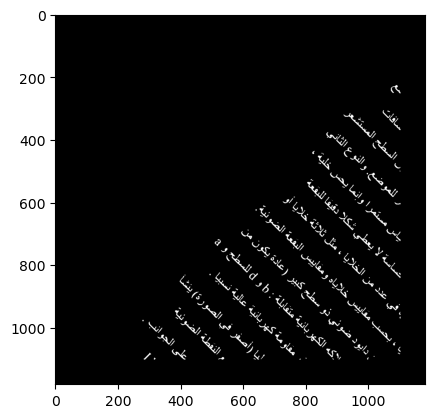

In [4]:
img=process_img(img)
plt.imshow(img, cmap='gray')

44.94461879730225


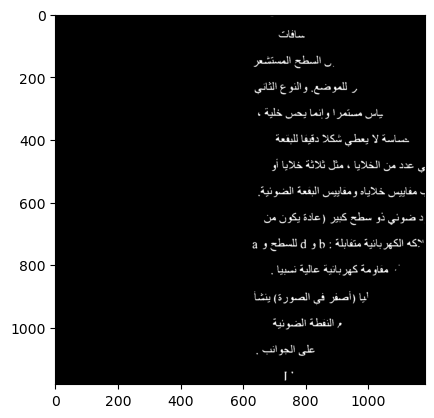

In [5]:
img=rotate_processed_image(img)
plt.imshow(img, cmap='gray')

In [6]:
# Directories setup
src_dir = "../Dataset"
dst_dir = "../Preprocessed Dataset"

# Ensure the destination directory exists
if not os.path.exists(dst_dir):
    os.makedirs(dst_dir)

# Process each image
for folder in os.listdir(src_dir):
    folder_path = os.path.join(src_dir, folder)
    save_path = os.path.join(dst_dir, folder)
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    
    for file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            processed_img = process_img(img)
            processed_img = rotate_processed_image(processed_img)
            save_img_path = os.path.join(save_path, file)
            cv2.imwrite(save_img_path, processed_img)
        else:
            print(f"Failed to read image: {img_path}")

c:\Users\Abdelaal\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Abdelaal\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


nan
82.88314986555544
46.24710941314697
89.86199775108925
80.90871829673893
nan
75.81063834103671
90.0
75.74983501434326
44.924066690298226
76.58972422281902
70.07640947614398
78.48272301169003
89.04293505350749
70.54936854044597
44.56437103400069
44.89060825771756
89.90354537963867
79.83921175003051
43.24082604531319
44.49330377578735
87.06892040797642
47.334829990680404
87.23627719363651
45.0
71.17577968944202
87.71654168490706
78.1627346447536
47.201208443477235
40.92919397354126
87.50468452609316
54.26520838056292
73.24124145507812
45.0
nan
44.92865368551459
43.77610918680827
89.57747268676758
63.23699296315511
45.08811823527018
81.60027864244249
87.88923622905344
82.10410225909689
81.34376395620951
85.70277095663137
88.86174706851735
86.78819563894561
76.86010784573025
44.93214936689897
45.01721884987571
77.71076282701995
81.24671749841599
75.15481080400183
89.83421543666294
73.07536915370396
76.93417387188606
86.862856970893
73.39126755355241
42.7592068195343
45.0
73.252214519794

c:\Users\Abdelaal\anaconda3\Lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\Abdelaal\anaconda3\Lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\Abdelaal\anaconda3\Lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


84.9731064833604
49.02468355496725
48.36662766427705
45.0
56.00578674754581
49.36683350575121
56.54906245640346
47.99579696655273
89.63179397583008
84.50135854085286
44.83143411363874
84.5333657063229
49.90597563776477
87.49670763713557
45.0
84.55563354492188
58.322891992681164
77.980459690094
73.7538340641902
55.19937275074147
44.99670308654071
83.5217793782552
85.52741128427012
49.31846433877945
44.951258447435166
40.460815386338666
45.18246114253998
72.03785788707243
44.56099431654986
44.92510612194355
74.93368746910566
44.59485196200284
56.46011606852213
44.95541693947532
44.579356781979826
nan
48.38536659876505
78.7323169708252
78.05186663175884
38.16261405479617
84.40964206429415
44.87432098388672
45.185404459635414
87.33901092529297
73.38487364116467
44.562443677116846
89.93146514892578
80.54042021433513
53.256063592844995
85.99038519510408
45.155161917209625
86.22327253553603
48.90645620856487
43.89904624340581
80.51408950805664
89.65201568603516
44.856058081802054
43.591506322